In [132]:
# https://www.kaggle.com/competitions/store-sales-time-series-forecasting

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
target_column='sales'

train_df = pd.read_csv('datasets/train.csv.zip')
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [135]:
test_df = pd.read_csv('datasets/test.csv')
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [136]:
transaction_df = pd.read_csv('datasets/transactions.csv.zip')
transaction_df

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [137]:
train_df.groupby(['date', 'store_nbr'])['sales'].sum()

date        store_nbr
2013-01-01  1                0.000000
            2                0.000000
            3                0.000000
            4                0.000000
            5                0.000000
                             ...     
2017-08-15  50           16879.121004
            51           20154.559000
            52           18600.046000
            53            8208.189000
            54           12666.858000
Name: sales, Length: 90936, dtype: float64

In [138]:
daily_sales_store_1 =train_df[(train_df['store_nbr']==1)].groupby(['date'])['sales'].sum()

In [139]:
daily_sales_store_1.index # dtype object

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
       '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14', '2017-08-15'],
      dtype='object', name='date', length=1684)

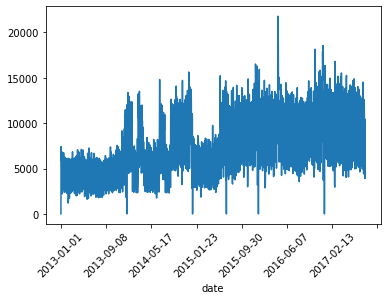

In [140]:
# Plot sales accross time
ax=daily_sales_store_1.plot(rot=45)

In [141]:
daily_sales = train_df.groupby(['date', 'store_nbr'])['sales'].sum().reset_index()
daily_sales

,date,store_nbr,sales
0,2013-01-01,1,0.000000
1,2013-01-01,2,0.000000
2,2013-01-01,3,0.000000
3,2013-01-01,4,0.000000
4,2013-01-01,5,0.000000
...,...,...,...
90931,2017-08-15,50,16879.121004
90932,2017-08-15,51,20154.559000
90933,2017-08-15,52,18600.046000
90934,2017-08-15,53,8208.189000


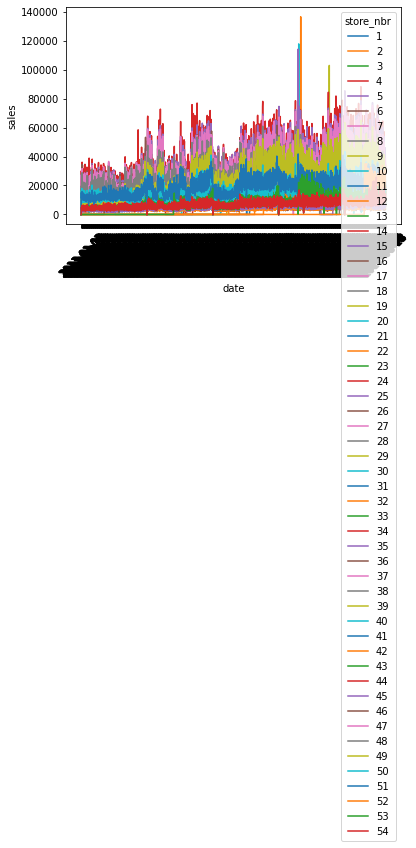

In [142]:
sns.lineplot(data=train_df.groupby(['date', 'store_nbr'])['sales'].sum().reset_index(),
             x='date',
             y='sales',
             palette="tab10",
             hue='store_nbr'
             )
plt.xticks(rotation=45);

<AxesSubplot: xlabel='date'>

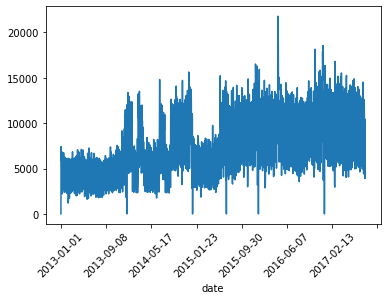

In [143]:
# perform linear regression on time
# https://www.statsmodels.org/devel/generated/statsmodels.tsa.deterministic.DeterministicProcess.html
daily_sales_store_1.plot(rot=45)

In [144]:
daily_sales_store_1.tail()

date
2017-08-11     5403.742021
2017-08-12     7543.623000
2017-08-13     3902.782000
2017-08-14    10433.314000
2017-08-15     9823.551018
Name: sales, dtype: float64

### Liear regession

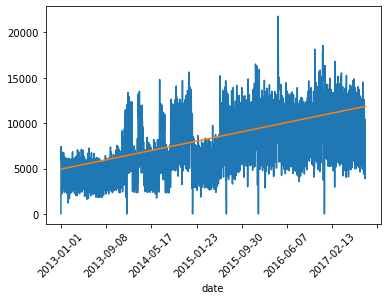

In [145]:
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

daily_sales_store_1 =train_df[(train_df['store_nbr']==1)].groupby(['date'])['sales'].sum()

dp=DeterministicProcess(index=daily_sales_store_1.index, order=1)
X=dp.in_sample()
y=daily_sales_store_1
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

daily_sales_store_1.plot(rot=45)
plt.plot(y_pred)

In [146]:
from sklearn.metrics import mean_squared_log_error

In [147]:
mean_squared_log_error(y_true=daily_sales_store_1, y_pred=y_pred ,squared=False)

0.6662495263814233

In [148]:
dp.out_of_sample(10)

/home/arawn/.local/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,trend
1685,1685.0
1686,1686.0
1687,1687.0
1688,1688.0
1689,1689.0
1690,1690.0
1691,1691.0
1692,1692.0
1693,1693.0
1694,1694.0


In [149]:
# perform linear regression on features
stores_df = pd.read_csv("datasets/stores.csv")
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [150]:
stores_df = stores_df.set_index('store_nbr')

In [151]:
extended_train = daily_sales.merge(stores_df,on="store_nbr")

In [152]:
extended_train.head()

,date,store_nbr,sales,city,state,type,cluster
0,2013-01-01,1,0.000000,Quito,Pichincha,D,13
1,2013-01-02,1,7417.148000,Quito,Pichincha,D,13
2,2013-01-03,1,5873.244001,Quito,Pichincha,D,13
3,2013-01-04,1,5919.879001,Quito,Pichincha,D,13
4,2013-01-05,1,6318.785010,Quito,Pichincha,D,13


In [153]:
from sklearn.preprocessing import OneHotEncoder

In [154]:
ohe = OneHotEncoder(sparse_output=False) # 
transformed = ohe.fit_transform(extended_train[['city',"state","type","cluster"]])

In [155]:
transformed_df = pd.DataFrame(transformed,columns=ohe.get_feature_names_out())

In [156]:
transformed_df

,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90934,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
model = LinearRegression()

In [158]:
target_column = "sales"

In [159]:
daily_sales.head()

,date,store_nbr,sales
0,2013-01-01,1,0.0
1,2013-01-01,2,0.0
2,2013-01-01,3,0.0
3,2013-01-01,4,0.0
4,2013-01-01,5,0.0


In [160]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city_Ambato                           90936 non-null  float64
 1   city_Babahoyo                         90936 non-null  float64
 2   city_Cayambe                          90936 non-null  float64
 3   city_Cuenca                           90936 non-null  float64
 4   city_Daule                            90936 non-null  float64
 5   city_El Carmen                        90936 non-null  float64
 6   city_Esmeraldas                       90936 non-null  float64
 7   city_Guaranda                         90936 non-null  float64
 8   city_Guayaquil                        90936 non-null  float64
 9   city_Ibarra                           90936 non-null  float64
 10  city_Latacunga                        90936 non-null  float64
 11  city_Libertad  

In [161]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       90936 non-null  object 
 1   store_nbr  90936 non-null  int64  
 2   sales      90936 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [162]:
model.fit(X=transformed_df,y=daily_sales[target_column])

LinearRegression()

In [163]:
test_df

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [164]:
# look at lag 1 in linear regressix²on
daily_sales_store_1 = daily_sales_store_1.reset_index()
daily_sales_store_1['lag1'] = daily_sales_store_1.sales.shift(1)
daily_sales_store_1['lag7'] = daily_sales_store_1.sales.shift(7)
daily_sales_store_1['lag15'] = daily_sales_store_1.sales.shift(15)
daily_sales_store_1.head()

,date,sales,lag1,lag7,lag15
0,2013-01-01,0.000000,NaN,NaN,NaN
1,2013-01-02,7417.148000,0.000000,NaN,NaN
2,2013-01-03,5873.244001,7417.148000,NaN,NaN
3,2013-01-04,5919.879001,5873.244001,NaN,NaN
4,2013-01-05,6318.785010,5919.879001,NaN,NaN


In [165]:
print(daily_sales_store_1[["sales","lag1","lag15","lag7"]].corr())

          sales      lag1     lag15      lag7
sales  1.000000  0.482582  0.375278  0.792031
lag1   0.482582  1.000000  0.774233  0.420740
lag15  0.375278  0.774233  1.000000  0.380850
lag7   0.792031  0.420740  0.380850  1.000000


In [166]:
# plot moving average
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [167]:
# find seasonality
# Plot monthly, biweekly sales distribution
# Plot Periodogram

In [168]:
# Perform ARIMA analysis